# 2 - The multilayer perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Activation - sigmoid

We'll first implement the required methods to represent it. As you recall, the sigmoid is defined by the following expression:

$$ \sigma(x) = \frac{1}{1 + e^{-x}}$$

Which corresponds to a function of S-shape, that cuts values to an output between 0 and 1 

<img src='sigmoid.png' />

It's derivative is also quite simple, which will be usefull when computing the required gradients:

$$\frac{\partial \sigma(z)}{\partial z} = \sigma(z)(1-\sigma(z))$$

Implement these in the following class, to be used as the activation of our MLP:

In [46]:
class Sigmoid:
    """
        Implementation of the sigmoid activation function
    """
    @classmethod
    def forward(cls, z):
        """
        Implementation of sigmoid
        """
        raise Exception('Not Implemented')
    
    @classmethod
    def backward(cls, z):
        """
        Implementation of derivative of sigmoid
        """
        raise Exception('Not Implemented')


Test it out in the dummy examples below 

In [4]:
assert Sigmoid.forward(0) == 0.5
assert Sigmoid.backward(0) == 0.25

assert np.allclose(Sigmoid.forward(np.array([0, 1])), np.array([0.5, 0.73105858]))
assert np.allclose(Sigmoid.backward(np.array([0, 1])), np.array([0.25, 0.19661193]))

assert np.allclose(Sigmoid.forward(np.array([1, 0])), np.array([0.73105858, 0.5]))
assert np.allclose(Sigmoid.backward(np.array([1, 0])), np.array([0.19661193, 0.25]))


Let's now move forward to the actual MLP. We already provide you with a class with the necessary struture, so that you can focus only on the required steps - feedforward and backpropagation. However, you should go over and understand the other methods presented, so that you can implement further on top of the structure.

## Feedforward 

You will start by implement the feedforward pass. Here, you want to compute the linear quantity of each node and its output. Use the expressions below to guide you:

$$\vec{z}^{lin} = \vec{x}^TW$$

$$\vec{z} = g(\vec{z}^{lin})$$


Implement the forward pass below for each layer, in the correct method (`layer_feedforward`). Notice that in the `feedforward` function we make use of your implementation and already make use of the auxiliar function `extend_bias` to add a collumn of ones to your layer's inputs whenever needed.

In [88]:
class SingleOutputMLP:
    """ Simple implementation of a Multi-layer perceptron"""
    
    num_layers = 1
    layer_sizes = []
    weights = None
    activation = None
    learning_rate = 0.1
    
    def __init__(self, layers, activation=Sigmoid):
        self.num_layers = len(layers) + 1
        self.layer_sizes = layers + [1]
        self.activation = activation
        self.initialize_weights()

    def initialize_weights(self):
        """
        Initialize weights randomly from uniform distributed shifted to represent [-0.5, 0.5]
        There are much better initialization methods, but we'll keep this for the sake of simplicity
        """
        weights = []
        for i in range(self.num_layers - 1):
            size_layer = self.layer_sizes[i]
            size_next_layer = self.layer_sizes[i+1]
            layer_weights = (np.random.rand(size_layer + 1, size_next_layer) - 0.5)
            weights.append(layer_weights)
            
        self.weights = weights

    def extend_bias(self, X):
        """
        Auxiliar function that adds a collumn of ones for the bias computation
        """
        samples = X.shape[0]
        return np.concatenate((X, np.ones([samples ,1])), axis=1)
        
    def layer_feedforward(self, X, w):
        """
        Implementation of the Feedforward for one layer
        
        Should receive:
        
        X [sample_size, input_layer_size + 1] - the input of the layer (already with line for bias)  
        w [input_layer_size + 1, output_layer_size] - the weights of the layer  
        
        Should return (Z, Z_lin)
        Z [output_layer_size, 1] - the outputs the layer 
        Z_lin [output_layer_size, 1] - the linear combination of inputs for the layer
        """
        ### YOUR CODE HERE
        raise Exception('Not Implemented')
        
    def feedforward(self, X):
        """
        Implementation of the Feedforward Pass
        
        Should receive the input X and return Z - the outputs for each layer - and Z_lin - the linear
        combination of inputs for the layer
        """
                
        # Use these arrays to keep the outputs (before and after activation) of each layer
        Z = [None] * self.num_layers
        Z_lin = [None] * self.num_layers
        
        layer_output = X
        for ix in range(self.num_layers-1):
            layer_weights = self.weights[ix]
            layer_input = self.extend_bias(layer_output)
            z, zlin = self.layer_feedforward(layer_input, layer_weights)
            Z[ix] = layer_input
            Z_lin[ix + 1] = zlin
            layer_output = z
        
        Z[-1] = layer_output
        return Z, Z_lin
    
    def output_delta_cross_entropy(self, p, y):
        """
            Implementation of the loss function gradient w.r.t the linear combination of the output 
            layer
            
            Should receive:
        
            p [sample_size, output_size = 1] - the output, a.k.a, the prediction of the model 
            y [sample_size, output_size = 1] - the expected label  

            Should return 
            delta_lin [sample_size, output_size = 1] - the derivative w.r.t the linear combination of inputs for the layer
        """
        ### YOUR CODE HERE
        raise Exception('Not Implemented')
    
    def hidden_backprop_delta(self, z_lin, w, d_next):
        """
            Implementation of the Backprop delta computation for one layer
            
            Should receive:
            
            Z_lin [sample_size, layer_size] - the linear combination of the layer
            d_next [sample_size, next_layer_size] - the deltas of the current layer for each sample
            w_next [layer_size, next_layer_size] - the weights of the layer without bias term

            Should return 
            delta [sample_size, layer_size] - deltas for the current layer
 
        """

        ### YOUR CODE HERE
        raise Exception('Not Implemented')

    def backprop_gradients(self, X, d):
        """
            Implementation of the Backprop gradient computation for one layer
            
            Should receive:
            
            X [sample_size, prev_layer_size + 1] - the input of the layer (already with line for bias)  
            d [sample_size, layer_size] - the deltas of the current layer for each sample

            Should return 
            gradients [prev_layer_size + 1, layer_size] - gradients for all the layers' weights (including bias term)
 
        """
        ### YOUR CODE HERE
        raise Exception('Not Implemented')

    def backpropagation(self, X, y):
        """
        Implementation of the Backpropagation Pass
        
        Should receive the input examples X and labels Y and return gradients for weights update
        Makes use of the previous feedforward function to get the z and z_lin in each layer
        """

        # Feedforward
        Z, Z_lin = self.feedforward(X)

        # Deltas are the derivatives of the loss w.r.t the nodes
        # Gradients are the derivatives of the loss w.r.t the weights for update
        deltas = [None] * self.num_layers
        gradients = [None] * (self.num_layers - 1)
        deltas[-1] = self.output_delta_cross_entropy(Z[-1], y)

        # Compute deltas
        for ix in range(self.num_layers-2, 0 , -1):
            # weights without bias
            layer_weights = self.weights[ix][:-1,:]
            deltas[ix] = self.hidden_backprop_delta(Z_lin[ix], layer_weights, deltas[ix + 1])

        # Compute gradients
        for ix in range(self.num_layers - 1):
            gradients[ix] = self.backprop_gradients(Z[ix], deltas[ix + 1])

        return gradients

    def train(self, X, y, iterations):
        y_2d = np.reshape(y, (y.shape[0], 1))
        for iteration in range(iterations):
            gradients = self.backpropagation(X, y_2d)
            for ix in range(len(self.weights)):
                self.weights[ix] = self.weights[ix] - self.learning_rate * gradients[ix]
                
    def predict(self, X):
        Z, _ = self.feedforward(X)
        return Z[-1]



Run the examples below

In [6]:
class LinearActivation:
    @classmethod
    def forward(cls, z):
        return 2*z
    
    @classmethod
    def backward(cls, z):
        return 2

# input of size 2 , 1 hidden layer of size 2
dummy_mlp = SingleOutputMLP([2, 2], activation=LinearActivation)
dummy_mlp.weights = [np.ones((3, 2)), np.ones((3, 1))]
dummy_z, dummy_z_lin = dummy_mlp.feedforward(np.array([[1.0, 1.0]])) 

assert np.allclose(dummy_z[0], np.array([[1., 1., 1.]])) # input layer
assert np.allclose(dummy_z[1], np.array([[6., 6., 1.]])) # hidden layer
assert np.allclose(dummy_z[2], np.array([[26.]])) # output layer

assert dummy_z_lin[0] == None # input layer does not have linear part
assert np.allclose(dummy_z_lin[1], np.array([[3., 3.]])) # hidden layer
assert np.allclose(dummy_z_lin[2], np.array([[13.]])) # output layer

class LinearActivation2:
    @classmethod
    def forward(cls, z):
        return z/2
    
    @classmethod
    def backward(cls, z):
        return 0.5

# input of size 2 , 2 hidden layer of size 2
dummy_mlp = SingleOutputMLP([2, 2, 2], activation=LinearActivation2)
dummy_mlp.weights = [np.ones((3, 2)), np.ones((3, 2)), np.ones((3, 1))]
dummy_z_2, dummy_z_lin_2 = dummy_mlp.feedforward(np.array([[0.5, 0.5]])) 

assert np.allclose(dummy_z_2[0], np.array([[0.5, 0.5, 1.]])) # input layer
assert np.allclose(dummy_z_2[1], np.array([[1., 1., 1.]])) # hidden layer 1
assert np.allclose(dummy_z_2[2], np.array([[1.5, 1.5, 1.]])) # hidden layer 2
assert np.allclose(dummy_z_2[3], np.array([[2.]])) # output layer

assert dummy_z_lin[0] == None # input layer does not have linear part
assert np.allclose(dummy_z_lin_2[1], np.array([[2., 2.]])) # hidden layer 1
assert np.allclose(dummy_z_lin_2[2], np.array([[3., 3.]])) # hidden layer 2
assert np.allclose(dummy_z_lin_2[3], np.array([[4.]])) # output layer


# more than 1 sample
dummy_z_3, dummy_z_lin_3 = dummy_mlp.feedforward(np.array([[0.5, 0.5], [1., 1.]])) 

# 2 samples
assert np.allclose(dummy_z_3[0], np.array([[0.5, 0.5, 1.], [1., 1., 1.]])) # input layer
assert np.allclose(dummy_z_3[1], np.array([[1., 1., 1.], [1.5, 1.5, 1.]])) # hidden layer 1
assert np.allclose(dummy_z_3[2], np.array([[1.5, 1.5, 1.], [2., 2., 1.]])) # hidden layer 2
assert np.allclose(dummy_z_3[3], np.array([[2.], [2.5]])) # output layer

assert dummy_z_lin[0] == None # input layer does not have linear part
assert np.allclose(dummy_z_lin_3[1], np.array([[2., 2.], [3., 3.]])) # hidden layer 1
assert np.allclose(dummy_z_lin_3[2], np.array([[3., 3.], [4., 4.]])) # hidden layer 2
assert np.allclose(dummy_z_lin_3[3], np.array([[4.], [5.]])) # output layer

## Backpropagation 

Now we need to implement the backpropagation. Once again, we alreday provide the base structure and only require you to fill the layer's internal computations.

Start by implementing the partial derivative w.r.t the linear score of the output node in `output_delta`. Since we are using the cross entropy as the loss function, your function should compute the following:

$$\frac{\partial L}{\partial p_{lin}} =  (y-p)$$

We now want to propagate this quantity to other nodes. Use the following expression and implement the `hidden_backprop_delta` function

$$\frac{\partial L}{\partial z_{lin_i}} = \sigma(z_{lin_i})(1 - \sigma(z_{lin_i}))\sum_j( \frac{\partial L}{\partial z_{lin_j}} w_{ij})$$

Then, implement the gratdient computation in `backprop_gradients` for every layer with the simple equation:

$$\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial z_{lin_j}} x_{i}$$


Test each of the implementations below:

In [12]:
# output delta tests
dummy_mlp = SingleOutputMLP([2, 2], activation=LinearActivation)
delta_function = dummy_mlp.output_delta_cross_entropy

assert delta_function(1.0, 0.0) == 1.0
assert np.allclose(delta_function(np.array([1.0, 1.0]), np.array([0., 0.])), np.array([1.0, 1.0]))
assert np.allclose(delta_function(np.array([1.5, 0.32]), np.array([0.4, 0.1])), np.array([1.1, 0.22]))
assert np.allclose(delta_function(np.array([1.5, 0.32, -2.3]), np.array([0.4, 0.1, .0])), np.array([1.1, 0.22, -2.3]))


## Training the network

We'll apply the training process now. We already implemented the train method in the MLP, so all you need to do is run the code with the data from the first problem. We'll use the same problem as before. Run the following code to see the evolution of the classification on this problem

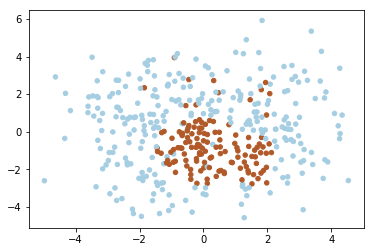

In [103]:
with open('source_data.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('label_data.npy', 'rb') as fin:
    y = np.load(fin)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()

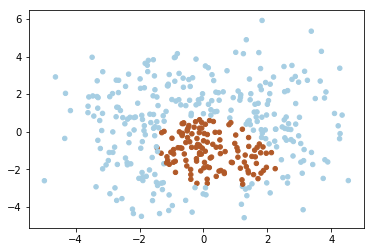

In [105]:
from IPython import display

np.random.seed(42)

BinaryClassMLP = SingleOutputMLP([2, 8, 8, 8], activation=Sigmoid)
iterations = 10000

p = BinaryClassMLP.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=p.round().flatten(), cmap=plt.cm.Paired, s=20)
plt.show()

loss_i = 0
loss = np.zeros(iterations)
for i in range(0, iterations, 200):
    BinaryClassMLP.train(X, y, 200)
    p = BinaryClassMLP.predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=p.round().flatten(), cmap=plt.cm.Paired, s=20)
    display.clear_output(wait=True)
    plt.show()